# Customer Revenue Prediction

Customers are the backbone of any modern business. They can lead your business to the greater heights if you know how to leverage their participation. Customers invest in your services and products at various stages of their customers journey which then are called Customer Revenue.
<br>
These revenue can be in the form of one-time sales or the recurring revenue.

### Importing Libraries

In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

### Reading Data

In [91]:
shop = pd.read_csv("online_shoppers_intention.csv")
shop.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Our target column is: Revenue - A boolean representing whether or not the user completed the purchase.

## Exploratory Data Analysis

### Statistical Description 

In [92]:
shop.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


### Shape of the dataset

In [93]:
shop.shape

(12330, 18)

### Finding Missing Values

In [94]:
shop.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

### Information about the data

In [95]:
shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

### Correlation Matrix

<AxesSubplot:>

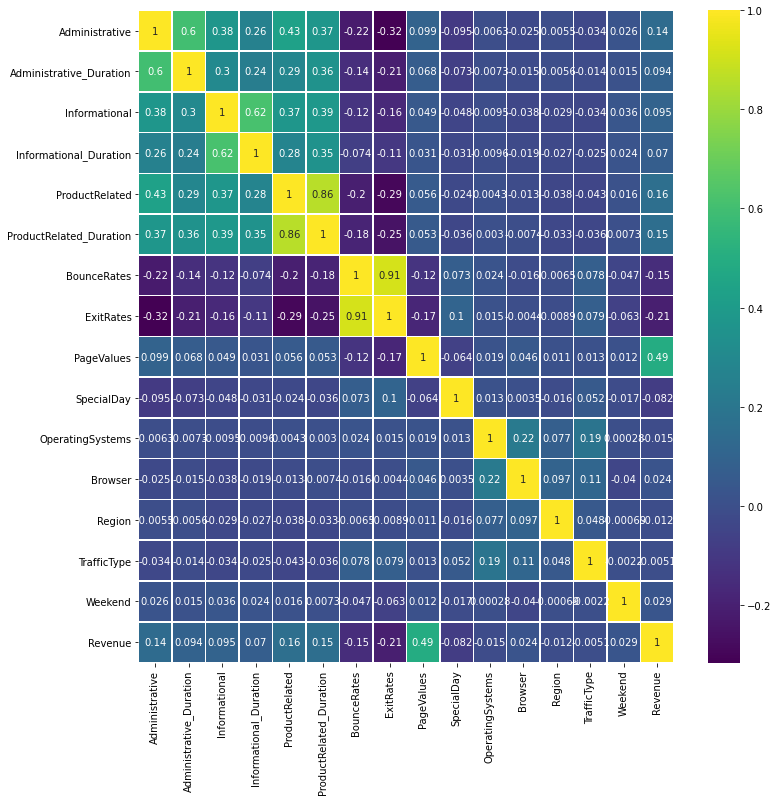

In [96]:
plt.figure(figsize=(12,12))
sns.heatmap(shop.corr(),annot=True,cmap='viridis',linewidths=.5)

## Data Preprocessing

### Creating Dummy Variables

#### 1. VisitorType  

In [97]:
visitor = pd.get_dummies(shop['VisitorType'],drop_first=True)

In [98]:
visitor.head()

,Other,Returning_Visitor
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [99]:
shop = pd.concat([shop,visitor],axis=1)

In [100]:
shop.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'Other', 'Returning_Visitor'],
      dtype='object')

### Creating X and y

In [101]:
X = shop.drop(['Revenue', 'Month', 'VisitorType','Administrative','Informational','ProductRelated'], axis = 1)
y = shop['Revenue']

In [102]:
y.value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [103]:
X.columns

Index(['Administrative_Duration', 'Informational_Duration',
       'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
       'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType',
       'Weekend', 'Other', 'Returning_Visitor'],
      dtype='object')

In [104]:
X.head()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Other,Returning_Visitor
0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,False,0,1
1,0.0,0.0,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,False,0,1
2,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,False,0,1
3,0.0,0.0,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,False,0,1
4,0.0,0.0,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,True,0,1


### Weekend Column and Target Column

The code converts the boolean values to float type - actually it converts all the data into float type. This has been done so that the sequential model is able to build tensors out of them

In [105]:
X['Weekend'] = np.asarray(X['Weekend']).astype(np.float32)

y = np.asarray(y).astype(np.float32)

In [106]:
X.head()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Other,Returning_Visitor
0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,0.0,0,1
1,0.0,0.0,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,0.0,0,1
2,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,0.0,0,1
3,0.0,0.0,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,0.0,0,1
4,0.0,0.0,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,1.0,0,1


In [107]:
y

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

#### Shape of Dataframe

In [108]:
X.shape

(12330, 14)

In [109]:
y.shape

(12330,)

## Model Building

### Train Test Split

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [112]:
columns_to_scaled = ['Administrative_Duration', 'Informational_Duration',
                     'ProductRelated_Duration', 'BounceRates', 'ExitRates',
                     'PageValues']

In [113]:
X_train.head()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Other,Returning_Visitor
1785,0.0,0.0,95.000000,0.014286,0.061905,0.000000,0.0,2,6,1,1,0.0,0,1
10407,14.0,0.0,1441.910588,0.002469,0.013933,2.769599,0.0,2,2,3,2,0.0,0,1
286,0.0,0.0,0.000000,0.200000,0.200000,0.000000,0.0,2,2,1,1,0.0,0,1
6520,49.2,379.0,74.600000,0.000000,0.018182,8.326728,0.0,2,2,8,2,0.0,0,0
12251,0.0,5.0,279.000000,0.040000,0.041667,0.000000,0.0,3,2,7,8,1.0,0,0


### Standard Scaler

In [114]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled_train = scaler.fit_transform(X_train[columns_to_scaled])

X_scaled_test = scaler.transform(X_test[columns_to_scaled])

#### Train Data (scaled)

In [115]:
X_scaled_train

array([[-0.45693682, -0.24516779, -0.57331315, -0.15533646,  0.40328167,
        -0.31559324],
       [-0.3780645 , -0.24516779,  0.12720379, -0.40428397, -0.59955507,
        -0.16574433],
       [-0.45693682, -0.24516779, -0.62272186,  3.75722679,  3.29012419,
        -0.31559324],
       ...,
       [-0.45693682, -0.24516779, -0.52442454, -0.45630286,  0.50282796,
        -0.31559324],
       [-0.45693682, -0.24516779, -0.46409391, -0.45630286, -0.54240812,
        -0.31559324],
       [ 0.32136402, -0.24516779, -0.50189937, -0.45630286, -0.29047942,
        -0.31559324]])

In [116]:
#Replacing values in original dataframe
X_train[columns_to_scaled] = X_scaled_train

<ipython-input-116-deca72a72b4a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[columns_to_scaled] = X_scaled_train
C:\Users\pulkit\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [117]:
X_train.head()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Other,Returning_Visitor
1785,-0.456937,-0.245168,-0.573313,-0.155336,0.403282,-0.315593,0.0,2,6,1,1,0.0,0,1
10407,-0.378064,-0.245168,0.127204,-0.404284,-0.599555,-0.165744,0.0,2,2,3,2,0.0,0,1
286,-0.456937,-0.245168,-0.622722,3.757227,3.290124,-0.315593,0.0,2,2,1,1,0.0,0,1
6520,-0.179757,2.482745,-0.583923,-0.456303,-0.510734,0.134924,0.0,2,2,8,2,0.0,0,0
12251,-0.456937,-0.209179,-0.477616,0.386403,-0.019790,-0.315593,0.0,3,2,7,8,1.0,0,0


#### Test Data (scaled)

In [118]:
X_scaled_test

array([[ 0.34587078, -0.24516779, -0.07545233, -0.36470439, -0.61814988,
        -0.31559324],
       [ 2.007211  ,  1.45024069,  0.67952613, -0.41000034, -0.7880497 ,
        -0.20271856],
       [-0.22524937, -0.24516779,  1.61887555, -0.44181188, -0.62276219,
        -0.12887328],
       ...,
       [-0.45693682, -0.07962164,  1.54475387, -0.25372931, -0.37155222,
        -0.31559324],
       [-0.15834873, -0.17679003,  3.64498787,  0.04026941, -0.06165699,
        -0.25170959],
       [-0.45693682, -0.24516779, -0.56161109,  0.59707955,  0.15441593,
        -0.31559324]])

In [119]:
#Replacing values in original dataframe
X_test[columns_to_scaled] = X_scaled_test

<ipython-input-119-e5c720df35eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[columns_to_scaled] = X_scaled_test
C:\Users\pulkit\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [120]:
X_test.head()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Other,Returning_Visitor
8916,0.345871,-0.245168,-0.075452,-0.364704,-0.618150,-0.315593,0.0,1,8,6,11,0.0,0,1
772,2.007211,1.450241,0.679526,-0.410000,-0.788050,-0.202719,0.0,2,2,3,2,0.0,0,1
12250,-0.225249,-0.245168,1.618876,-0.441812,-0.622762,-0.128873,0.0,2,2,2,2,0.0,0,1
7793,0.337420,-0.245168,-0.307200,-0.280739,-0.339168,1.668558,0.0,2,5,7,4,0.0,0,1
6601,2.969164,5.036474,1.950899,-0.316587,-0.608031,0.233606,0.0,2,2,3,1,1.0,0,1


In [121]:
X_train.shape,y_train.shape

((9864, 14), (9864,))

In [122]:
X_test.shape,y_test.shape

((2466, 14), (2466,))

### Building ANN

In [123]:
#Importing models and Layers 

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense,Dropout

In [124]:
#Initialising the ANN
model = Sequential()

#Adding the input layer and the first hidden layer

#input_dim is the total features to predict the label
#units are the neurons in the first hidden layer
# kernel_initializer is a fancy term for which statistical distribution or function to use for initialising the weights. (0 to 1)
#In case of statistical distribution, the library will generate numbers from that statistical distribution and use as starting weights.
model.add(Dense(activation = 'relu', input_dim=14 , units = 18, kernel_initializer = 'uniform'))

#Adding second hidden layer
model.add(Dense(activation = 'relu', units=32 , kernel_initializer='uniform'))

#Adding second hidden layer
model.add(Dense(activation = 'relu', units=16 , kernel_initializer='uniform'))

#Adding the output layer
model.add(Dense(activation='sigmoid', units=1, kernel_initializer='uniform'))

#Compiling the ANN
#(binary_crossentropy used when just binary label is there to predict)(just one output)
model.compile(optimizer = 'adam', loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [125]:
#Summary of model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 18)                270       
_________________________________________________________________
dense_9 (Dense)              (None, 32)                608       
_________________________________________________________________
dense_10 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 1,423
Trainable params: 1,423
Non-trainable params: 0
_________________________________________________________________


In [126]:
#Fitting the ANN to the data
model.fit(X_train,y_train,batch_size=128,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
78/78 [==============================] - 3s 6ms/step - loss: 0.5589 - accuracy: 0.8474 - val_loss: 0.4029 - val_accuracy: 0.8333
Epoch 2/100
78/78 [==============================] - 0s 2ms/step - loss: 0.3409 - accuracy: 0.8574 - val_loss: 0.3284 - val_accuracy: 0.8637
Epoch 3/100
78/78 [==============================] - 0s 2ms/step - loss: 0.2881 - accuracy: 0.8903 - val_loss: 0.2952 - val_accuracy: 0.8788
Epoch 4/100
78/78 [==============================] - 0s 2ms/step - loss: 0.2726 - accuracy: 0.8927 - val_loss: 0.2942 - val_accuracy: 0.8792
Epoch 5/100
78/78 [==============================] - 0s 2ms/step - loss: 0.2677 - accuracy: 0.8925 - val_loss: 0.2852 - val_accuracy: 0.8820
Epoch 6/100
78/78 [==============================] - 0s 2ms/step - loss: 0.2654 - accuracy: 0.8924 - val_loss: 0.2843 - val_accuracy: 0.8828
Epoch 7/100
78/78 [==============================] - 0s 2ms/step - loss: 0.2639 - accuracy: 0.8922 - val_loss: 0.2825 - val_accuracy: 0.8828
Epoch 8/100
7

Epoch 59/100
78/78 [==============================] - 0s 3ms/step - loss: 0.2463 - accuracy: 0.8987 - val_loss: 0.2729 - val_accuracy: 0.8816
Epoch 60/100
78/78 [==============================] - 0s 3ms/step - loss: 0.2456 - accuracy: 0.8997 - val_loss: 0.2713 - val_accuracy: 0.8820
Epoch 61/100
78/78 [==============================] - 0s 3ms/step - loss: 0.2457 - accuracy: 0.8999 - val_loss: 0.2706 - val_accuracy: 0.8812
Epoch 62/100
78/78 [==============================] - 0s 3ms/step - loss: 0.2453 - accuracy: 0.8997 - val_loss: 0.2692 - val_accuracy: 0.8820
Epoch 63/100
78/78 [==============================] - 0s 3ms/step - loss: 0.2450 - accuracy: 0.9003 - val_loss: 0.2711 - val_accuracy: 0.8812
Epoch 64/100
78/78 [==============================] - 0s 2ms/step - loss: 0.2444 - accuracy: 0.9001 - val_loss: 0.2701 - val_accuracy: 0.8796
Epoch 65/100
78/78 [==============================] - 0s 2ms/step - loss: 0.2461 - accuracy: 0.8997 - val_loss: 0.2714 - val_accuracy: 0.8808
Epoch 

### Early Stopping

In [127]:
#Importing EarlyStopping
from keras.callbacks import EarlyStopping

In [128]:
#Here we are monitoring 'validation_loss' and mode is 'min' that means, stop if the loss is not decreasing
#mode should be 'max' in accuracy as stop training if the accuracy is not increasing
#patience=20 means we will wait for 20 epochs even if we detected stopping point
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=20)

In [129]:
#Fitting the ANN to the data with Early Stopping Callback
model.fit(X_train,y_train,batch_size=128,epochs=100,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/100
78/78 [==============================] - 0s 2ms/step - loss: 0.2407 - accuracy: 0.9000 - val_loss: 0.2735 - val_accuracy: 0.8816
Epoch 2/100
78/78 [==============================] - 0s 2ms/step - loss: 0.2415 - accuracy: 0.9004 - val_loss: 0.2735 - val_accuracy: 0.8804
Epoch 3/100
78/78 [==============================] - 0s 2ms/step - loss: 0.2429 - accuracy: 0.9001 - val_loss: 0.2707 - val_accuracy: 0.8808
Epoch 4/100
78/78 [==============================] - 0s 2ms/step - loss: 0.2409 - accuracy: 0.8997 - val_loss: 0.2730 - val_accuracy: 0.8804
Epoch 5/100
78/78 [==============================] - 0s 2ms/step - loss: 0.2406 - accuracy: 0.9001 - val_loss: 0.2708 - val_accuracy: 0.8775
Epoch 6/100
78/78 [==============================] - 0s 2ms/step - loss: 0.2423 - accuracy: 0.9009 - val_loss: 0.2697 - val_accuracy: 0.8820
Epoch 7/100
78/78 [==============================] - 0s 2ms/step - loss: 0.2396 - accuracy: 0.9012 - val_loss: 0.2744 - val_accuracy: 0.8775
Epoch 8/100
7

In [130]:
#Losses and Accuracy from Model
loss_accuracy = pd.DataFrame(model.history.history)
loss_accuracy.head()

,loss,accuracy,val_loss,val_accuracy
0,0.240662,0.900041,0.273500,0.881590
1,0.241515,0.900446,0.273499,0.880373
2,0.242909,0.900142,0.270709,0.880779
3,0.240885,0.899736,0.273030,0.880373
4,0.240635,0.900142,0.270782,0.877534


In [132]:
losses = loss_accuracy[['loss','val_loss']]
losses.head()

,loss,val_loss
0,0.240662,0.273500
1,0.241515,0.273499
2,0.242909,0.270709
3,0.240885,0.273030
4,0.240635,0.270782


<AxesSubplot:>

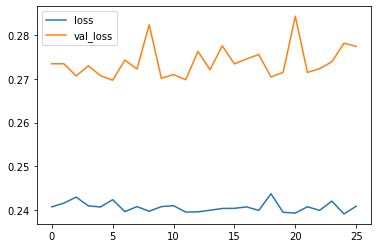

In [133]:
losses.plot()

### Predictions

In [134]:
#Predicting the test results
y_pred = model.predict_classes(X_test)

C:\Users\pulkit\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [138]:
#Same as above
y_pred = (model.predict(X_test) > 0.5).astype("int32")

In [139]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [140]:
len(y_pred)

2466

## Evaluation Metrics

In [141]:
#Confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [143]:
print(confusion_matrix(y_test,y_pred))

[[1983   72]
 [ 225  186]]


In [144]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93      2055
         1.0       0.72      0.45      0.56       411

    accuracy                           0.88      2466
   macro avg       0.81      0.71      0.74      2466
weighted avg       0.87      0.88      0.87      2466



In [145]:
#Accuracy
accuracy_score(y_test,y_pred)

0.8795620437956204

In [146]:
model.metrics_names

['loss', 'accuracy']

In [147]:
model.evaluate(X_test,y_test)

78/78 [==============================] - 0s 1ms/step - loss: 0.2775 - accuracy: 0.8796


[0.27748584747314453, 0.8795620203018188]

Model is reaching loss of 28% and accuracy of approx. 88%

### Save the model

In [177]:
model.save('customer_revenue_model.h5')